## 유가 분석

### 유가 사이트 알아보기

In [1]:
from selenium import webdriver

driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.get('http://www.opinet.co.kr') # 주유소 가격 정보 사이트 

In [5]:
# 페이지 전환이 안될 때 실행
# driver.get('http://www.opinet.co.kr/searRgSelect.do')

In [2]:
# 광역시도 선택 구간
# id 넣어서 실행
sido_list_raw = driver.find_element_by_id('SIDO_NM0')
sido_list_raw

<selenium.webdriver.remote.webelement.WebElement (session="f9635e2404e224a3b015d832e3a8e16b", element="43214D9FCC7E0DC657CAC144DF32BC68_element_126")>

??

In [3]:
# id가 있던 태그 내부의 option 태그 확인
sido_list = sido_list_raw.find_elements_by_tag_name('option')
sido_list

[<selenium.webdriver.remote.webelement.WebElement (session="f9635e2404e224a3b015d832e3a8e16b", element="43214D9FCC7E0DC657CAC144DF32BC68_element_127")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f9635e2404e224a3b015d832e3a8e16b", element="43214D9FCC7E0DC657CAC144DF32BC68_element_128")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f9635e2404e224a3b015d832e3a8e16b", element="43214D9FCC7E0DC657CAC144DF32BC68_element_129")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f9635e2404e224a3b015d832e3a8e16b", element="43214D9FCC7E0DC657CAC144DF32BC68_element_130")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f9635e2404e224a3b015d832e3a8e16b", element="43214D9FCC7E0DC657CAC144DF32BC68_element_131")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f9635e2404e224a3b015d832e3a8e16b", element="43214D9FCC7E0DC657CAC144DF32BC68_element_132")>,
 <selenium.webdriver.remote.webelement.WebElement (session="f9635e2404e224a3b015d8

??? 원하는 결과값이 전혀 아니다

In [4]:
# 광역시도 이름 확인
sido_names = [option.get_attribute('value') for option in sido_list]
sido_names.remove('')
sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [5]:
# 박스 내용 바꾸기
# sido_names에서 가져와서 시도
sido_list_raw.send_keys(sido_names[0]) # 서울

In [6]:
# 시군구도 동일하게
# 시군구 id = SIGUNGU_NM0
gu_list_raw = driver.find_element_by_id('SIGUNGU_NM0')
gu_list = gu_list_raw.find_elements_by_tag_name('option')

gu_names = [option.get_attribute('value') for option in gu_list]
gu_names.remove('')
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

### 데이터 저장

In [7]:
# 엑셀 저장
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id('SIGUNGU_NM0')
    element.send_keys(gu)
    time.sleep(2)
    
    element_get_excel = driver.find_element_by_id('glopopd_excel').click()
    time.sleep(1)

C:\Users\LeeHB\AppData\Local\Temp\ipykernel_27620\2109340383.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_names):


  0%|          | 0/25 [00:00<?, ?it/s]

In [8]:
driver.close()

### 다운받은 데이터 정리

In [11]:
import pandas as pd
from glob import glob

In [15]:
# 파일 불러오기
# station_files = glob('D:/data/지역_*.xls') # 노트북
station_files = glob('C://Users/LeeHB/Downloads/지역_*.xls') # 데스크탑
station_files

['C://Users/LeeHB/Downloads\\지역_위치별(주유소) (1).xls',
 'C://Users/LeeHB/Downloads\\지역_위치별(주유소) (10).xls',
 'C://Users/LeeHB/Downloads\\지역_위치별(주유소) (11).xls',
 'C://Users/LeeHB/Downloads\\지역_위치별(주유소) (12).xls',
 'C://Users/LeeHB/Downloads\\지역_위치별(주유소) (13).xls',
 'C://Users/LeeHB/Downloads\\지역_위치별(주유소) (14).xls',
 'C://Users/LeeHB/Downloads\\지역_위치별(주유소) (15).xls',
 'C://Users/LeeHB/Downloads\\지역_위치별(주유소) (16).xls',
 'C://Users/LeeHB/Downloads\\지역_위치별(주유소) (17).xls',
 'C://Users/LeeHB/Downloads\\지역_위치별(주유소) (18).xls',
 'C://Users/LeeHB/Downloads\\지역_위치별(주유소) (19).xls',
 'C://Users/LeeHB/Downloads\\지역_위치별(주유소) (2).xls',
 'C://Users/LeeHB/Downloads\\지역_위치별(주유소) (20).xls',
 'C://Users/LeeHB/Downloads\\지역_위치별(주유소) (21).xls',
 'C://Users/LeeHB/Downloads\\지역_위치별(주유소) (22).xls',
 'C://Users/LeeHB/Downloads\\지역_위치별(주유소) (23).xls',
 'C://Users/LeeHB/Downloads\\지역_위치별(주유소) (24).xls',
 'C://Users/LeeHB/Downloads\\지역_위치별(주유소) (3).xls',
 'C://Users/LeeHB/Downloads\\지역_위치별(주유소) (4).xls',
 'C://Users/LeeH

In [18]:
# 파일 확인
tmp = pd.read_excel(station_files[5], header=2)
tmp.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,만남의광장주유소,서울 서초구 양재대로12길 73-71,알뜰(ex),02-573-7430,Y,-,1523,1333,-
1,서울특별시,양재최고주유소,서울 서초구 매헌로 72 (양재동),S-OIL,02-2057-5189,N,-,1595,1455,-
2,서울특별시,서초하이웨이 주유소,서울 서초구 양재대로2길 100-30,S-OIL,02-577-5151,Y,1767,1597,1457,-
3,서울특별시,신반포주유소,서울 서초구 사평대로 94 (반포동),SK에너지,02-533-5151,Y,1818,1601,1496,-
4,서울특별시,HD현대오일뱅크㈜직영 팔레스주유소,서울 서초구 사평대로 136 (반포동),현대오일뱅크,02-720-0020,N,1819,1602,1497,-


In [19]:
# 여러개의 파일 하나로 합치기
# 형식이 동일하고 그냥 이어붙이기만 할 때는 concat
tmp_raw = []

for file_name in station_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

station_raw = pd.concat(tmp_raw)

In [20]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 33
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      442 non-null    object
 1   상호      442 non-null    object
 2   주소      442 non-null    object
 3   상표      442 non-null    object
 4   전화번호    442 non-null    object
 5   셀프여부    442 non-null    object
 6   고급휘발유   442 non-null    object
 7   휘발유     442 non-null    object
 8   경유      442 non-null    object
 9   실내등유    442 non-null    object
dtypes: object(10)
memory usage: 38.0+ KB


In [21]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1569,1439,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1594,1485,-
2,서울특별시,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-6956-6674,Y,1846,1616,1508,1590
3,서울특별시,명일주유소,서울 강동구 고덕로 168 (명일동),자가상표,02-3428-1739,Y,1825,1625,1499,-
4,서울특별시,대성석유(주)길동주유소,서울 강동구 천호대로 1168,GS칼텍스,02-474-7222,N,1875,1626,1498,1600


In [22]:
# 데이터프레임 제작
station = pd.DataFrame({'상호':station_raw['상호'],
                       '주소':station_raw['주소'],
                       '가격':station_raw['휘발유'],
                       '셀프':station_raw['셀프여부'],
                       '상표':station_raw['상표']
                       }
                       )
station.head()


,상호,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1569,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1594,N,현대오일뱅크
2,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1616,Y,GS칼텍스
3,명일주유소,서울 강동구 고덕로 168 (명일동),1625,Y,자가상표
4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1626,N,GS칼텍스


In [23]:
station['구'] = [eachAddress.split()[1] for eachAddress in station['주소']]
station.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1569,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1594,N,현대오일뱅크,강동구
2,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1616,Y,GS칼텍스,강동구
3,명일주유소,서울 강동구 고덕로 168 (명일동),1625,Y,자가상표,강동구
4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1626,N,GS칼텍스,강동구


In [24]:
station['구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [26]:
# - 붙은 데이터 제외
station = station[station['가격'] != '-']
station.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1569,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1594,N,현대오일뱅크,강동구
2,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1616,Y,GS칼텍스,강동구
3,명일주유소,서울 강동구 고덕로 168 (명일동),1625,Y,자가상표,강동구
4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1626,N,GS칼텍스,강동구


In [30]:
# 수치적 연산을 위해 float 형으로 변경  
station['가격'] = station['가격'].astype('float')

In [31]:
station

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1569.0,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1594.0,N,현대오일뱅크,강동구
2,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1616.0,Y,GS칼텍스,강동구
3,명일주유소,서울 강동구 고덕로 168 (명일동),1625.0,Y,자가상표,강동구
4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1626.0,N,GS칼텍스,강동구
...,...,...,...,...,...,...
29,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2188.0,N,현대오일뱅크,강남구
30,갤러리아주유소,서울 강남구 압구정로 426,2275.0,N,SK에너지,강남구
31,SK논현주유소,서울 강남구 논현로 747 (논현동),2355.0,N,SK에너지,강남구
32,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2398.0,N,현대오일뱅크,강남구


In [32]:
station.reset_index(inplace=True)
station

,index,상호,주소,가격,셀프,상표,구
0,0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1569.0,Y,현대오일뱅크,강동구
1,1,구천면주유소,서울 강동구 구천면로 357 (암사동),1594.0,N,현대오일뱅크,강동구
2,2,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1616.0,Y,GS칼텍스,강동구
3,3,명일주유소,서울 강동구 고덕로 168 (명일동),1625.0,Y,자가상표,강동구
4,4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1626.0,N,GS칼텍스,강동구
...,...,...,...,...,...,...,...
435,29,㈜새서울석유 새서울주유소,서울 강남구 압구정로 154,2188.0,N,현대오일뱅크,강남구
436,30,갤러리아주유소,서울 강남구 압구정로 426,2275.0,N,SK에너지,강남구
437,31,SK논현주유소,서울 강남구 논현로 747 (논현동),2355.0,N,SK에너지,강남구
438,32,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2398.0,N,현대오일뱅크,강남구


In [33]:
# 넘버링은 이미 붙어있으니 index 칼럼 삭제
del station['index']
station.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1569.0,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1594.0,N,현대오일뱅크,강동구
2,(주)소모 신월주유소,서울 강동구 양재대로 1323 (성내동),1616.0,Y,GS칼텍스,강동구
3,명일주유소,서울 강동구 고덕로 168 (명일동),1625.0,Y,자가상표,강동구
4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,1626.0,N,GS칼텍스,강동구


### 주유 가격 시각화

In [34]:
# 주유가격 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import koreanize_matplotlib

<Axes: title={'center': '가격'}, xlabel='셀프'>

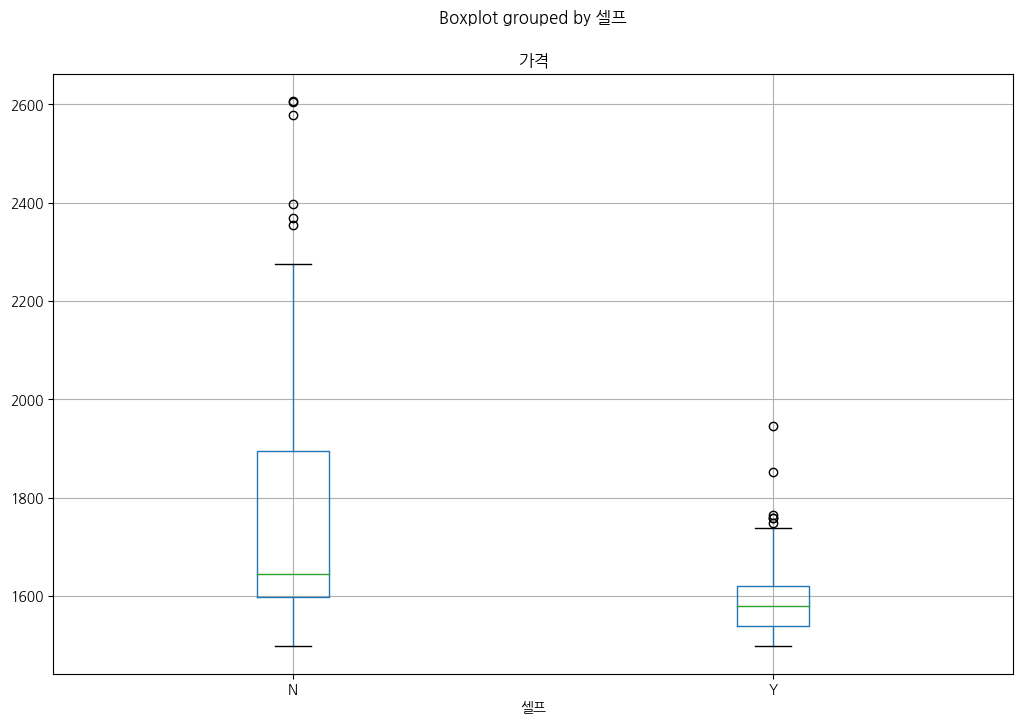

In [35]:
station.boxplot(column='가격', by='셀프', figsize =(12,8))

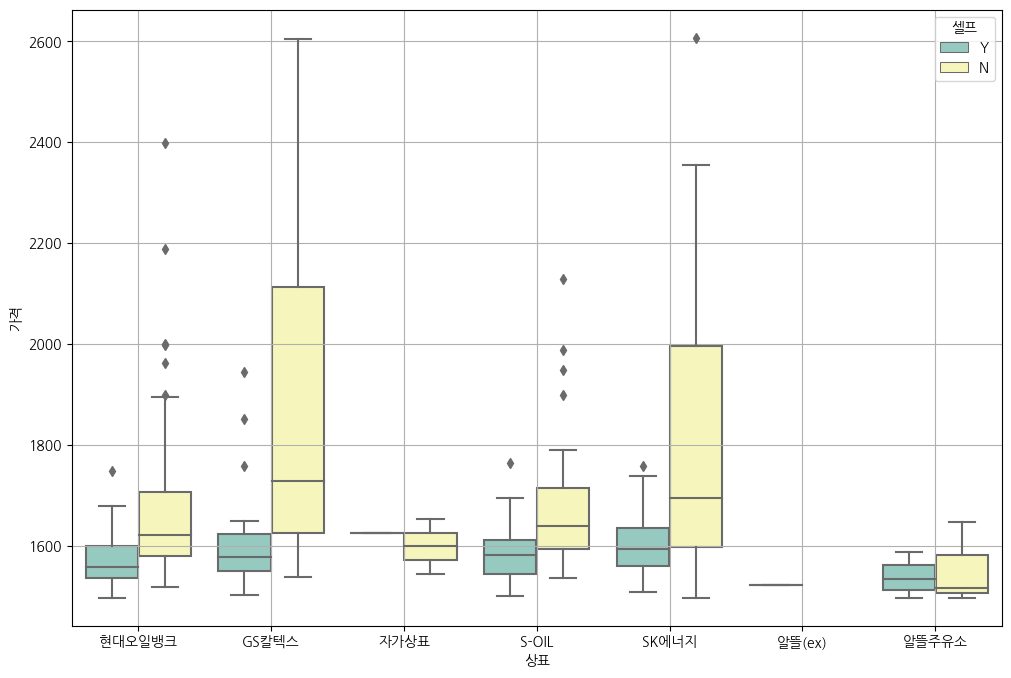

In [36]:
# 메이커별 주유가격 시각화
plt.figure(figsize=(12, 8))
sns.boxplot(x='상표', y='가격', hue='셀프', data = station, palette='Set3')
plt.grid()
plt.show()

In [38]:
# 지도 시각화
import json
import folium
import warnings

warnings.simplefilter(action = 'ignore', category=FutureWarning)

In [41]:
# 가격이 높은 주유소 순서로 정렬
station.sort_values(by='가격', ascending=False).head(10)

,상호,주소,가격,셀프,상표,구
270,서남주유소,서울 중구 통일로 30,2607.0,N,SK에너지,중구
235,서계주유소,서울 용산구 청파로 367 (청파동),2605.0,N,GS칼텍스,용산구
439,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2578.0,N,GS칼텍스,강남구
438,(주)제이제이네트웍스 제이제이주유소,서울 강남구 언주로 716,2398.0,N,현대오일뱅크,강남구
269,필동주유소,서울 중구 퇴계로 196 (필동2가),2369.0,N,GS칼텍스,중구
437,SK논현주유소,서울 강남구 논현로 747 (논현동),2355.0,N,SK에너지,강남구
436,갤러리아주유소,서울 강남구 압구정로 426,2275.0,N,SK에너지,강남구
268,약수주유소,서울 중구 다산로 173,2267.0,N,GS칼텍스,중구
260,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2250.0,N,GS칼텍스,종로구
259,경복궁주유소,서울 종로구 율곡로 6 (중학동),2240.0,N,GS칼텍스,종로구


In [42]:
# 가격이 낮은 순으로 정렬
station.sort_values(by='가격', ascending=True).head(10)

,상호,주소,가격,셀프,상표,구
286,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1497.0,N,알뜰주유소,강서구
163,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1497.0,N,SK에너지,양천구
285,화곡역주유소,서울 강서구 강서로 154 (화곡동),1497.0,Y,알뜰주유소,강서구
284,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),1497.0,Y,현대오일뱅크,강서구
164,현대주유소,서울 양천구 남부순환로 372 (신월동),1501.0,Y,S-OIL,양천구
165,플라트(주)서호주유소,서울 양천구 남부순환로 317,1502.0,Y,GS칼텍스,양천구
166,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),1509.0,Y,SK에너지,양천구
287,목화주유소,서울 강서구 국회대로 251 (화곡동),1512.0,Y,알뜰주유소,강서구
167,양천구주유소,서울 양천구 국회대로 275 (목동),1512.0,Y,알뜰주유소,양천구
168,지에스이앤알 직영 서울주유소,서울 양천구 신정로 236 (신정동),1515.0,Y,GS칼텍스,양천구


In [43]:
# 구별 주유소 평균 가격
import numpy as np

In [44]:
gu_data = pd.pivot_table(station, index=['구'], values=['가격'], aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1858.235294
강동구,1669.785714
강북구,1542.583333
강서구,1609.909091
관악구,1644.642857
